In [19]:
# Define the folder path
import pandas as pd

# Define the folder path on the D drive
folder_path = "D:/sprint1 projt"

# Define the file paths using the folder path
sp500_companies_path = f"{folder_path}/sp500_companies.csv"
sp500_index_path = f"{folder_path}/sp500_index.csv"
sp500_stocks_path = f"{folder_path}/sp500_stocks.csv"

# Load the datasets
sp500_companies = pd.read_csv(sp500_companies_path)
sp500_index = pd.read_csv(sp500_index_path)
sp500_stocks = pd.read_csv(sp500_stocks_path)

print("data read succesfully")

data read succesfully


In [21]:
# Convert 'Date' columns to datetime format
sp500_index['Date'] = pd.to_datetime(sp500_index['Date'])
sp500_stocks['Date'] = pd.to_datetime(sp500_stocks['Date'])

# Check for missing values
print(sp500_companies.isnull().sum())
print(sp500_index.isnull().sum())
print(sp500_stocks.isnull().sum())

# Drop rows with missing data or fill them as needed
sp500_stocks = sp500_stocks.dropna()  # Dropping rows with NaN values for simplicity


Exchange                0
Symbol                  0
Shortname               0
Longname                0
Sector                  0
Industry                0
Currentprice            0
Marketcap               0
Ebitda                 29
Revenuegrowth           2
City                    0
State                  20
Country                 0
Fulltimeemployees       5
Longbusinesssummary     0
Weight                  0
dtype: int64
Date      0
S&P500    0
dtype: int64
Date             0
Symbol           0
Adj Close    97921
Close        97921
High         97921
Low          97921
Open         97921
Volume       97921
dtype: int64


In [23]:
# Drop rows with missing values in the stock data
sp500_stocks_clean = sp500_stocks.dropna()

# Check if missing values are removed
print(sp500_stocks_clean.isnull().sum())


Date         0
Symbol       0
Adj Close    0
Close        0
High         0
Low          0
Open         0
Volume       0
dtype: int64


In [25]:
# Interpolate missing values in stock price columns (forward-fill)
sp500_stocks[['Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume']] = sp500_stocks[['Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume']].interpolate()

# Check again if missing values are handled
print(sp500_stocks.isnull().sum())


Date         0
Symbol       0
Adj Close    0
Close        0
High         0
Low          0
Open         0
Volume       0
dtype: int64


In [27]:
# Fill missing EBITDA with the median of the column
sp500_companies['Ebitda'].fillna(sp500_companies['Ebitda'].median(), inplace=True)

# Fill remaining missing values with 0 or a placeholder
sp500_companies.fillna(0, inplace=True)
sp500_stocks.fillna(0, inplace=True)

# Check again for missing values
print(sp500_companies.isnull().sum())
print(sp500_stocks.isnull().sum())


C:\Users\ABC\AppData\Local\Temp\ipykernel_13080\2271581503.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sp500_companies['Ebitda'].fillna(sp500_companies['Ebitda'].median(), inplace=True)


Exchange               0
Symbol                 0
Shortname              0
Longname               0
Sector                 0
Industry               0
Currentprice           0
Marketcap              0
Ebitda                 0
Revenuegrowth          0
City                   0
State                  0
Country                0
Fulltimeemployees      0
Longbusinesssummary    0
Weight                 0
dtype: int64
Date         0
Symbol       0
Adj Close    0
Close        0
High         0
Low          0
Open         0
Volume       0
dtype: int64


In [35]:
# Drop columns with too many missing values
sp500_stocks.drop(columns=['Adj Close', 'Close'], inplace=True)

# Check if columns are removed
print(sp500_stocks.isnull().sum())



Date      0
Symbol    0
High      0
Low       0
Open      0
Volume    0
dtype: int64
after cleaning the data


In [51]:
# Filter for specific companies
companies_to_plot = ['AAPL', 'MSFT', 'GOOGL']
selected_companies_data = sp500_stocks[sp500_stocks['Symbol'].isin(companies_to_plot)]


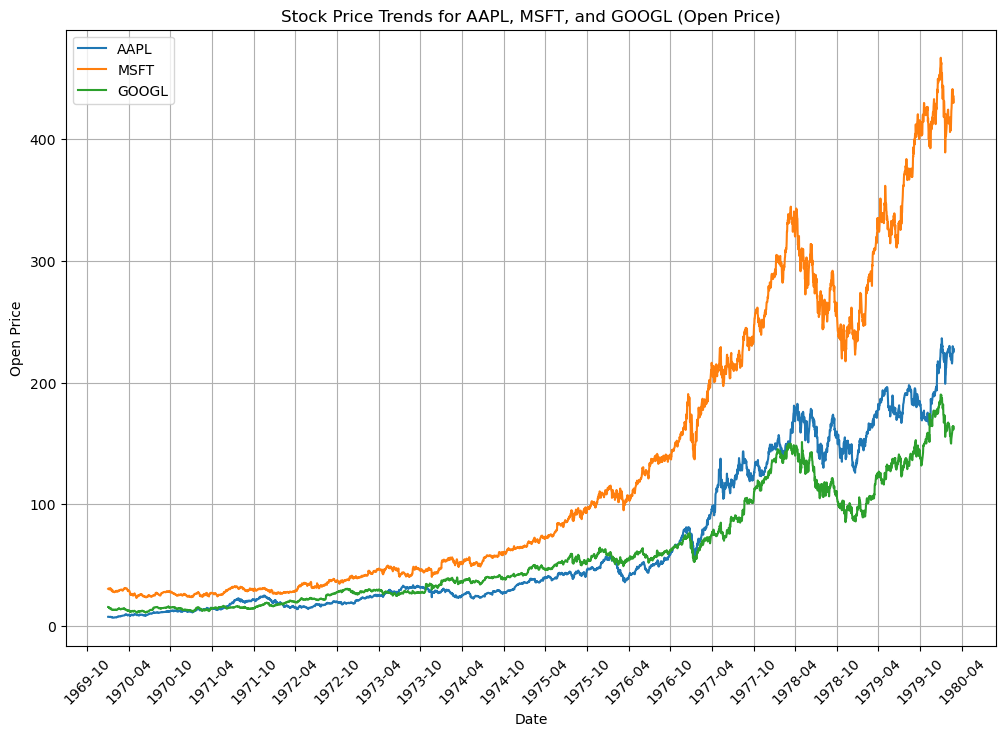

In [41]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.dates as mdates

# List of companies to plot (e.g., AAPL, MSFT, GOOGL)
companies_to_plot = ['AAPL', 'MSFT', 'GOOGL']

# Assuming you have a DataFrame called 'combined_data' with stock data
# Filter the data for the selected companies
selected_companies_data = combined_data[combined_data['Symbol'].isin(companies_to_plot)]

# Plotting stock price trends using 'Open' price over time
plt.figure(figsize=(12, 8))  # Increased figure size for better readability

for company in companies_to_plot:
    company_data = selected_companies_data[selected_companies_data['Symbol'] == company]
    plt.plot(company_data['Date'], company_data['Open'], label=company)  # Using 'Open' instead of 'Adj Close'

# Improving x-axis readability
plt.title('Stock Price Trends for AAPL, MSFT, and GOOGL (Open Price)')
plt.xlabel('Date')
plt.ylabel('Open Price')
plt.legend()

# Formatting the x-axis (dates)
plt.grid(True)
plt.xticks(rotation=45)

# Set major ticks format for the dates, and reduce the number of ticks shown
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=6))  # Show ticks every 6 months
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))  # Format as Year-Month

plt.show()





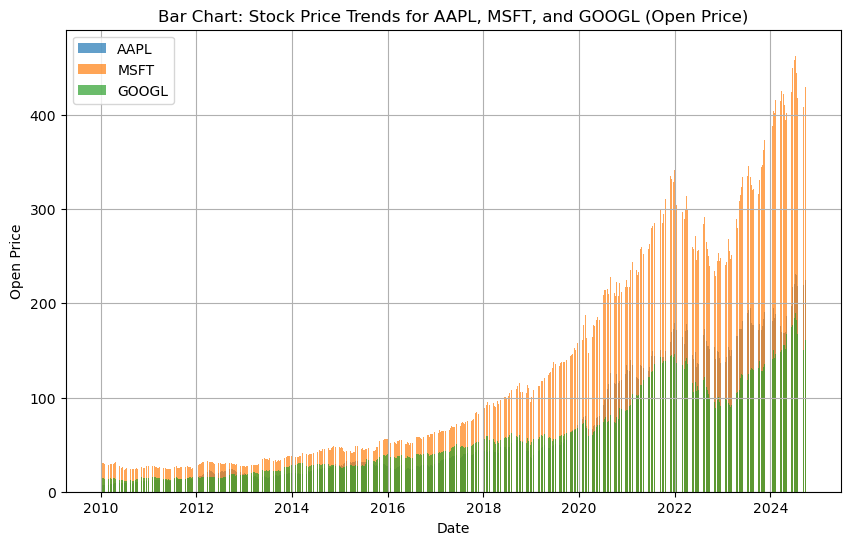

In [64]:
#data in bar graph
import matplotlib.pyplot as plt

# List of companies to plot (e.g., AAPL, MSFT, GOOGL)
companies_to_plot = ['AAPL', 'MSFT', 'GOOGL']

# Bar chart for stock 'Open' prices over time
plt.figure(figsize=(10, 6))

for company in companies_to_plot:
    company_data = selected_companies_data[selected_companies_data['Symbol'] == company]
    plt.bar(company_data['Date'], company_data['Open'], label=company, alpha=0.7)

plt.title('Bar Chart: Stock Price Trends for AAPL, MSFT, and GOOGL (Open Price)')
plt.xlabel('Date')
plt.ylabel('Open Price')
plt.legend()
plt.grid(True)
plt.show()


In [66]:
# Merge S&P 500 index data with individual stock data based on Date
combined_data = pd.merge(sp500_stocks, sp500_index, on='Date', how='inner')


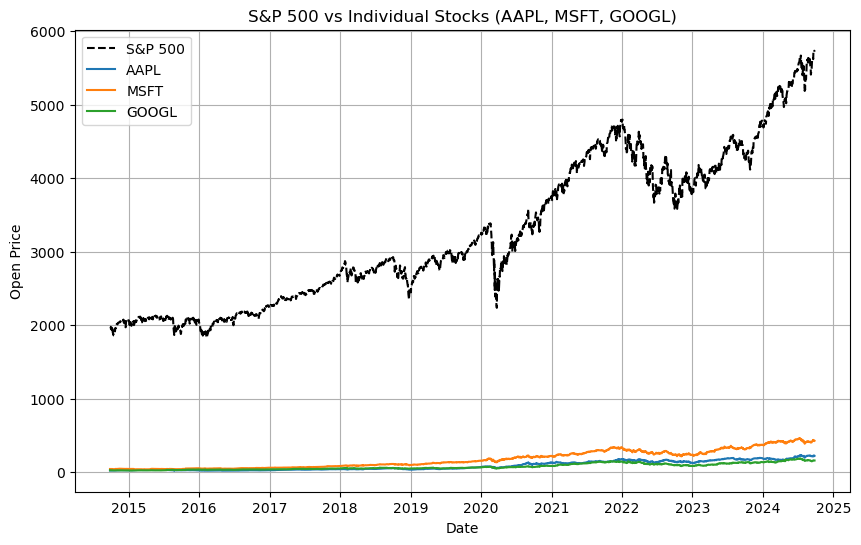

In [70]:
# Plot individual stock prices along with the S&P 500 index
plt.figure(figsize=(10, 6))

# Plot S&P 500 index
plt.plot(sp500_index['Date'], sp500_index['S&P500'], label='S&P 500', color='black', linestyle='--')

# Plot individual companies using 'Open' prices instead of 'Adj Close'
for company in companies_to_plot:
    company_data = combined_data[combined_data['Symbol'] == company]
    
    # Check if 'Open' column exists and use it instead of 'Adj Close'
    if 'Open' in company_data.columns:
        plt.plot(company_data['Date'], company_data['Open'], label=company)
    else:
        print(f"Column 'Open' not found for {company}")

plt.title('S&P 500 vs Individual Stocks (AAPL, MSFT, GOOGL)')
plt.xlabel('Date')
plt.ylabel('Open Price')
plt.legend()
plt.grid(True)
plt.show()



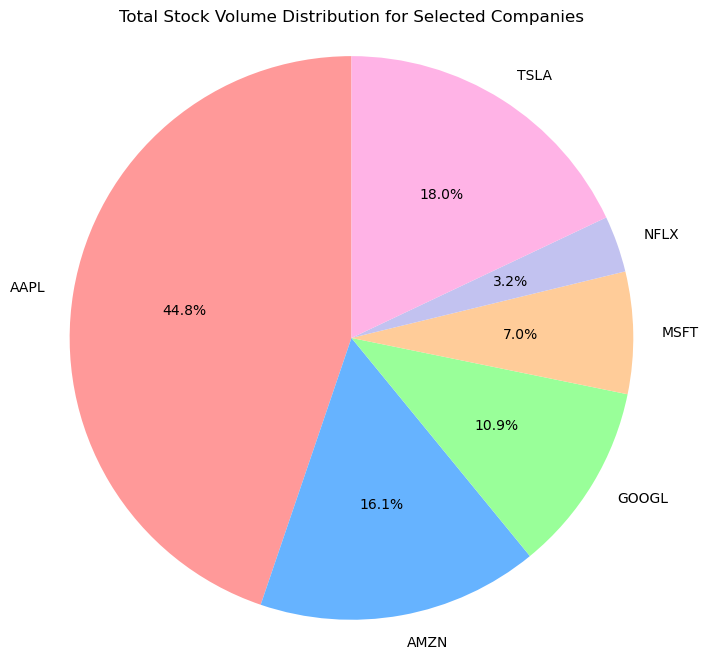

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# Select companies for the pie chart
companies_to_plot = ['AMZN', 'GOOGL', 'TSLA', 'AAPL', 'MSFT', 'NFLX']

# Filter the data for selected companies and calculate the total volume for each
volume_data_filtered = combined_data[combined_data['Symbol'].isin(companies_to_plot)].groupby('Symbol')['Volume'].sum()

# Pie chart for total volume comparison
plt.figure(figsize=(8, 8))
plt.pie(volume_data_filtered, labels=volume_data_filtered.index, autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0','#ffb3e6'])

plt.title('Total Stock Volume Distribution for Selected Companies')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
plt.show()



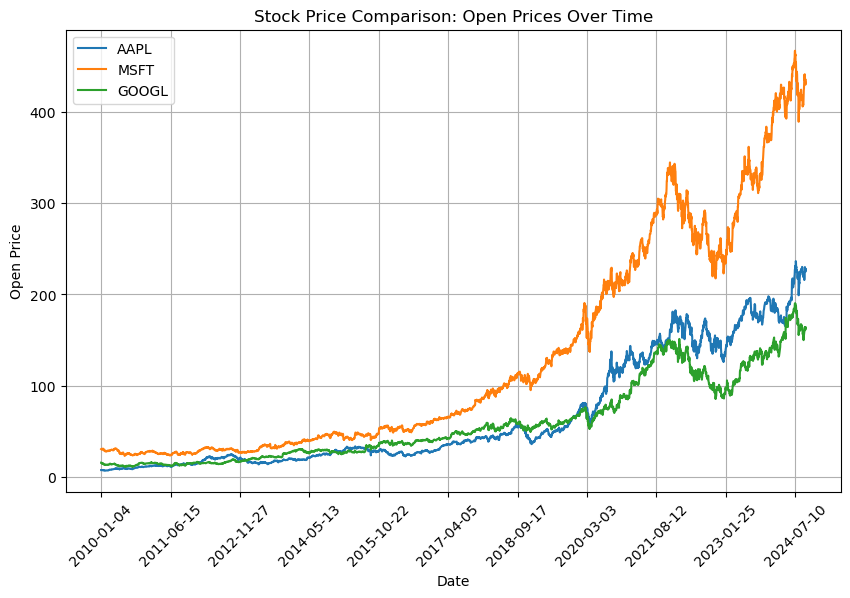

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Line chart for Open prices over time
plt.figure(figsize=(10, 6))

# Plot individual companies
for company in companies_to_plot:
    company_data = combined_data[combined_data['Symbol'] == company]
    plt.plot(company_data['Date'], company_data['Open'], label=company)

plt.title('Stock Price Comparison: Open Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Open Price')

# Rotate x-axis labels and set major locator
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(mdates.YearLocator(1))  # Show year ticks only

plt.legend()
plt.grid(True)
plt.show()


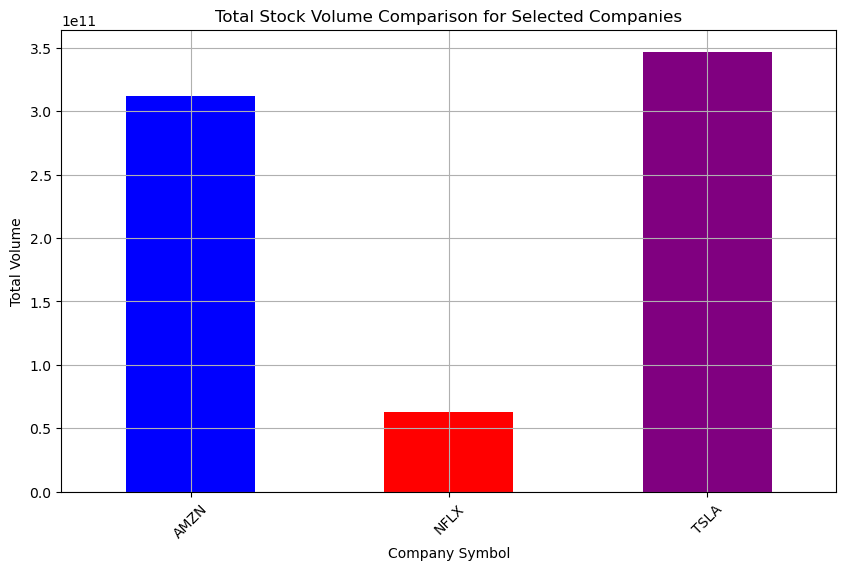

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Select different companies (example: AMZN, NFLX, TSLA)
companies_to_plot = ['AMZN', 'NFLX', 'TSLA']  # You can add/remove symbols here

# Filter the data to only include the selected companies
volume_data_filtered = combined_data[combined_data['Symbol'].isin(companies_to_plot)].groupby('Symbol')['Volume'].sum()

# Bar chart for total volume of selected companies
plt.figure(figsize=(10, 6))
volume_data_filtered.plot(kind='bar', color=['blue', 'red', 'purple'])

plt.title('Total Stock Volume Comparison for Selected Companies')
plt.xlabel('Company Symbol')
plt.ylabel('Total Volume')

plt.xticks(rotation=45)
plt.grid(True)
plt.show()


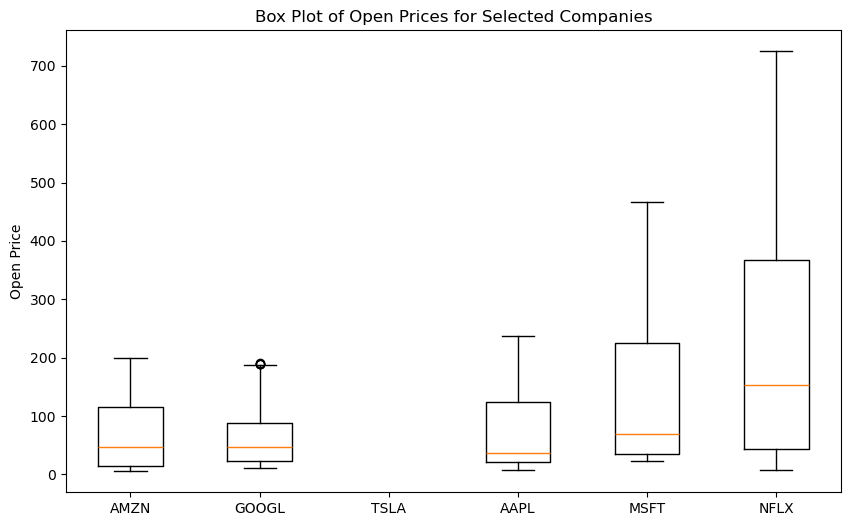

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

# Box plot for Open prices
plt.figure(figsize=(10, 6))

# Extract data for companies to plot
company_data_to_plot = [combined_data[combined_data['Symbol'] == company]['Open'] for company in companies_to_plot]

# Create the box plot without the gridlines
plt.boxplot(company_data_to_plot, labels=companies_to_plot)

plt.title('Box Plot of Open Prices for Selected Companies')
plt.ylabel('Open Price')
plt.grid(False)  # Remove the background grid
plt.show()
